# Lesson: 1_sMRI Modalities

## Objectives
- Visualize structural MR images (NifTi)

## Python Requirements
- [matplotlib](https://matplotlib.org/)
- [nibabel](https://nipy.org/nibabel/)
- [nilearn](https://nilearn.github.io/index.html)

## For neuroimaging studies, a good practice is to use Brain Imaging Data Structure (BIDS) to organize imaging dataset
- See this [paper](https://www.nature.com/articles/sdata201644) and [starter-kit](https://github.com/bids-standard/bids-starter-kit/wiki) for more details
- See this [tutorial](https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI) for a BIDS carpentry lesson 
- Here is a typical directory structure for a sample dataset

<img src="../fig/bids_structure.jpeg" width="600">

## For the sake of simplicity, in this tutorial we will use a pre-organized data from nilearn datasets

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting

In [17]:
# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First anatomical nifti image (3D) located is at: %s' %
      haxby_dataset.anat[0])

First anatomical nifti image (3D) located is at: /Users/nikhil/nilearn_data/haxby2001/subj2/anat.nii.gz


### Read T1w anatomical image

In [24]:
haxby_anat_filename = haxby_dataset.anat[0]
img = nib.load(haxby_anat_filename)

print('image name: {},\nimage shape: {}'.format(haxby_anat_filename, img.shape))

image name: /Users/nikhil/nilearn_data/haxby2001/subj2/anat.nii.gz,
image shape: (124, 256, 256)


### Visualize image
 - Single slice from three views: Coronal, Sagittal, Axial

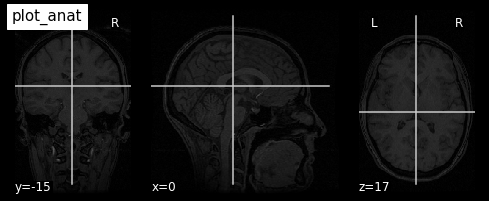

In [25]:
plotting.plot_anat(haxby_anat_filename, title="plot_anat")

### Visualize image
 - Slice montage from three views: Coronal, Sagittal, Axial

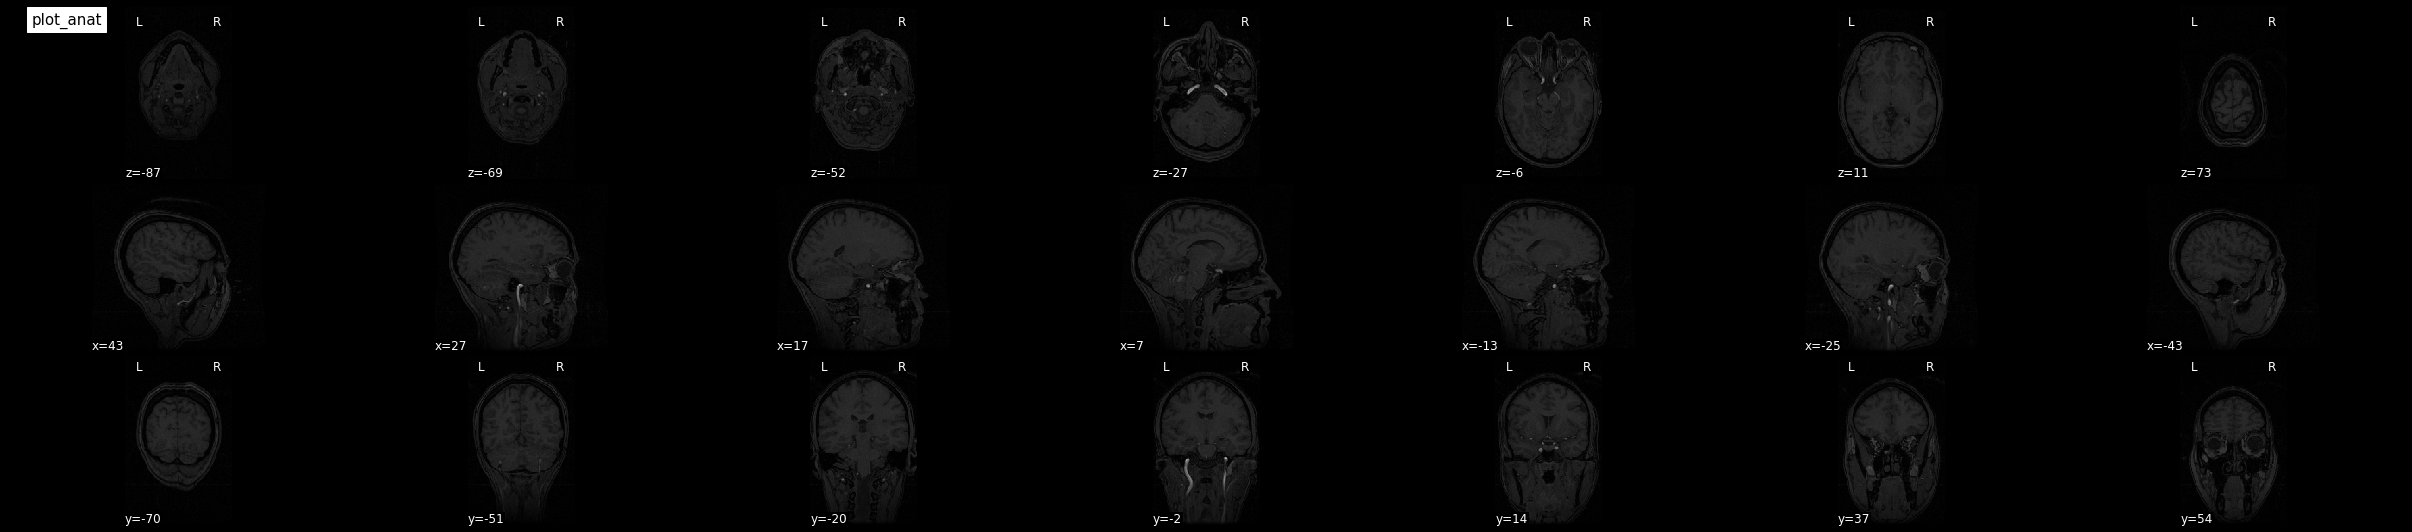

In [10]:
plotting.plot_anat(haxby_anat_filename, title="plot_anat", display_mode='mosaic')

### Visualize image
 - Interactive scroll of slices

/Users/nikhil/anaconda3/envs/napari/lib/python3.6/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



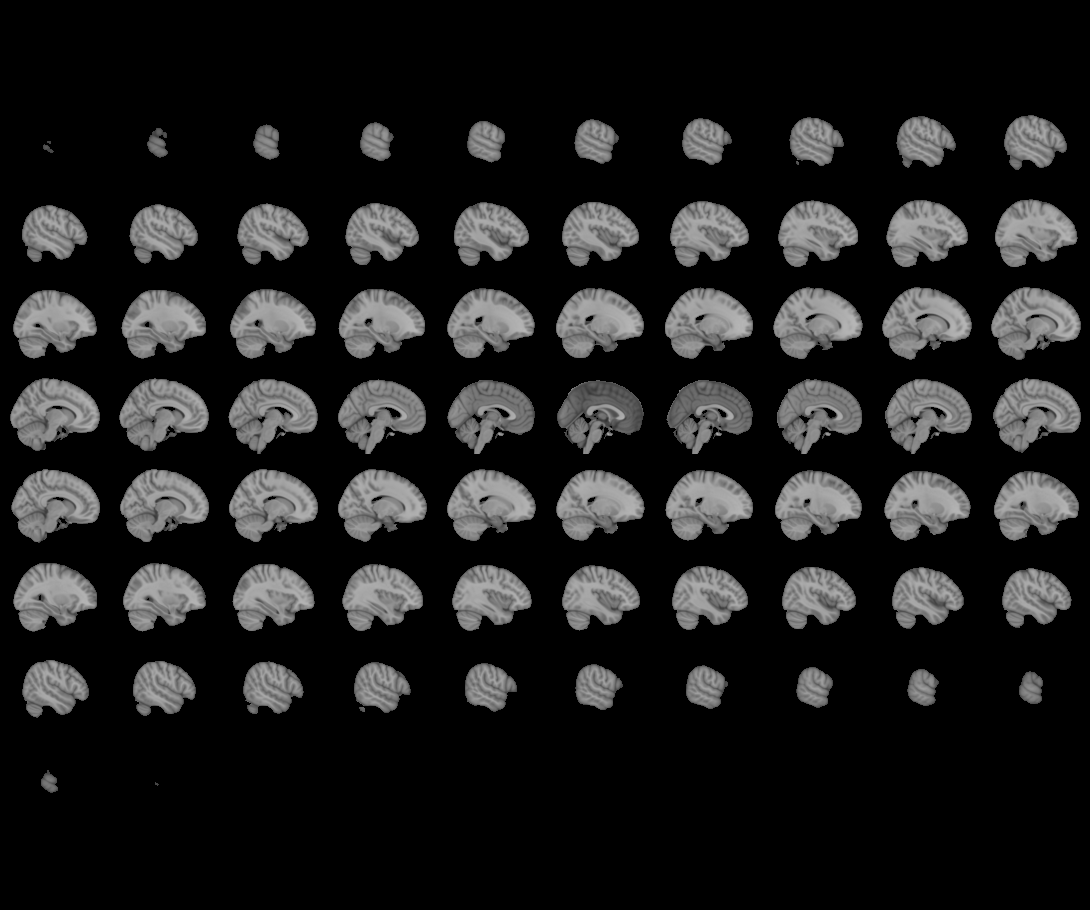
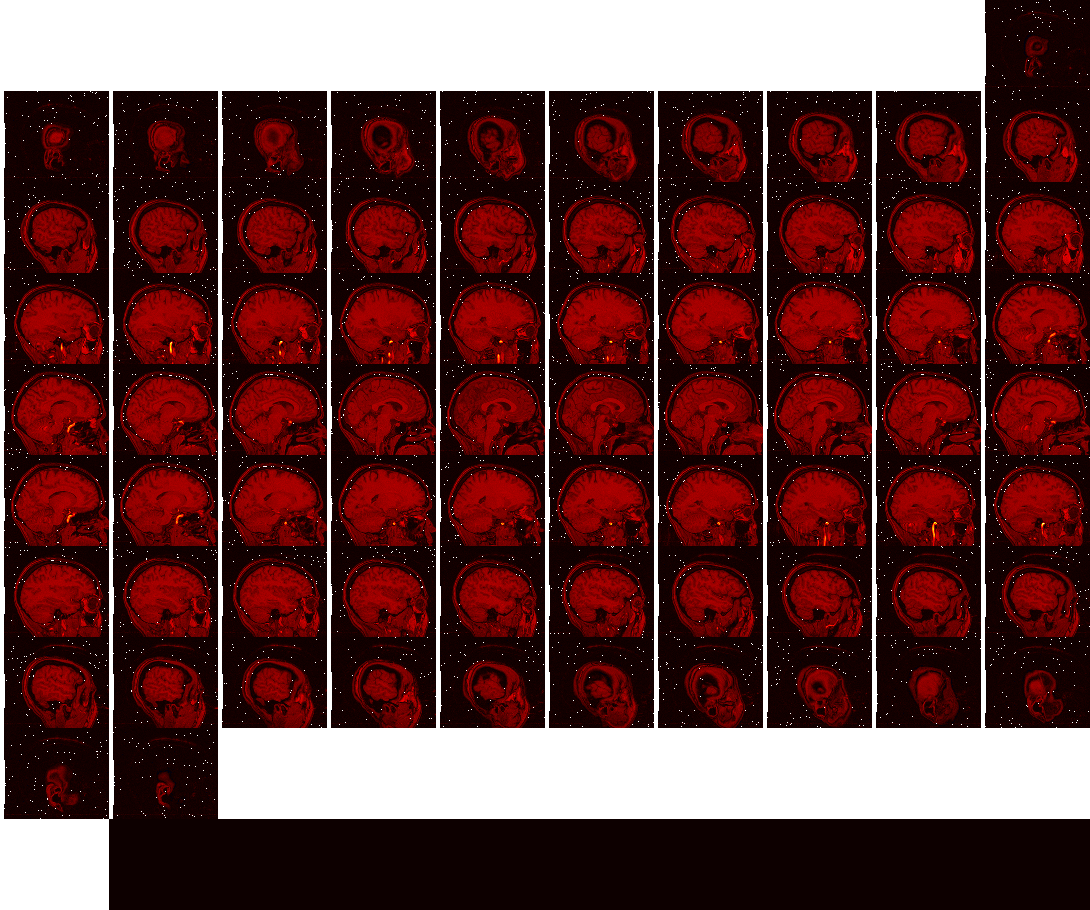

In [27]:
view = plotting.view_img(img,colorbar=False)
view

Note: we will discuss the x,y,z coordinate system in future lessons! 